In [1]:
import sys
print(sys.version)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.compat import v1 as tf_v1
print(tf.version)
tf.compat.v1.disable_eager_execution()
import sklearn
from sklearn import datasets
from sklearn import model_selection

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


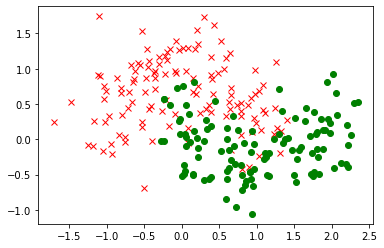

In [3]:
N = 300
X, t = sklearn.datasets.make_moons(N, noise=0.3)
T = t.reshape(N, 1)
X_train, X_test, T_train, T_test = sklearn.model_selection.train_test_split(X, T, train_size=0.8)

X0_train = []
X1_train = []
for idx, x_train in enumerate(X_train):
    if T_train[idx][0] == 0:
        X0_train.append(list(x_train))
    elif T_train[idx][0] == 1:
        X1_train.append(x_train)
X0_train = np.array(X0_train)
X1_train = np.array(X1_train)

plt.plot(X0_train[:,0], X0_train[:,1], 'x', color='red');
plt.plot(X1_train[:,0], X1_train[:,1], 'o', color='green');

In [8]:
num_hidden = 5

x = tf_v1.placeholder(tf.float32, shape=[None, 2])

W = tf.Variable(tf.random.truncated_normal([2, num_hidden]))
b = tf.Variable(tf.zeros([num_hidden]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

V = tf.Variable(tf.random.truncated_normal([num_hidden, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

t = tf_v1.placeholder(tf.float32, shape=[None, 1])

cross_entropy = -tf.reduce_sum(t*tf.math.log(y) + (1-t)*tf.math.log(1-y))
learning_rate = 0.05
train_step = tf_v1.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [9]:
batch_size = 50
n_batches = N // batch_size

init = tf_v1.global_variables_initializer()
sess = tf_v1.Session()
sess.run(init)

for epoch in range(1000):
    X_shuffle, T_shuffle = sklearn.utils.shuffle(X_train, T_train)

    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        sess.run(train_step, feed_dict={
            x: X_shuffle[start:end],
            t: T_shuffle[start:end]
        })

In [10]:
correct_prediction = tf.equal(tf_v1.to_float(tf.greater(y, 0.5)), t)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

accuracy_rate = accuracy.eval(session=sess, feed_dict={
    x: X_test,
    t: T_test
})

print()
print('accuracy_rate =')
print(accuracy_rate)


accuracy_rate =
0.9


In [11]:
print('W =')
print(sess.run(W))
print()

print('b =')
print(sess.run(b))
print()

print('V =')
print(sess.run(V))
print()

print('c =')
print(sess.run(c))
print()

W =
[[  0.4592381    8.005778   -11.967593    -2.6672454    5.2320895 ]
 [  4.452218     1.493807     0.01323266  -5.4927135    6.6873894 ]]

b =
[ -5.6801977 -11.70105    -4.7955527  -1.3472408  -6.56706  ]

V =
[[ -4.6129827]
 [ 10.995294 ]
 [-10.7786255]
 [  4.3387604]
 [ -6.0319705]]

c =
[1.1114823]

